# 0.Data Information

## About Dataset :

**1. Unnamed: 0** - Index.

**2. car_name** - Name of the car.

**3. car_prices_in_rupee** - Price of the car given in rupees.

**4. kms_driven** - Number of Kilometers driven.

**5. fuel_type** - Type of fuel used in the car.

**6. transmission** - Transmission type in the car.

**7. ownership** - Number of previous owners.

**8. manufacture** - Manufacture year.

**9. engine** - Size of the engine.

**10. Seats** - Number of seats in the car.

# 1.Import Libraries

In [1]:
# common 
import os
import numpy as np
import pandas as pd

# encoder
from sklearn.preprocessing import LabelEncoder

# splitting the data
from sklearn.model_selection import train_test_split

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# model
from sklearn.ensemble import RandomForestRegressor

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# fine tuning
from sklearn.model_selection import GridSearchCV

# warnings
import warnings
warnings.filterwarnings('ignore')

# 2.Import Data

In [2]:
# walk through the directories
for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
# import the data
data_dir = "/kaggle/input/old-car-price-prediction/car_price.csv"
df = pd.read_csv('./car_price.csv')

In [6]:
# view the data frame
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


# 3.Data Pre-Processing

In [7]:
# shape the data frame
df.shape

(5512, 10)

In [8]:
# viewing the column name
df.columns

Index(['Unnamed: 0', 'car_name', 'car_prices_in_rupee', 'kms_driven',
       'fuel_type', 'transmission', 'ownership', 'manufacture', 'engine',
       'Seats'],
      dtype='object')

In [9]:
# datatypes of each column
df.dtypes

Unnamed: 0              int64
car_name               object
car_prices_in_rupee    object
kms_driven             object
fuel_type              object
transmission           object
ownership              object
manufacture             int64
engine                 object
Seats                  object
dtype: object

In [10]:
# check for null values
df.isna().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [11]:
# make a copy of a data frame
df_copy = df.copy()
df_copy.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [12]:
# remove unwanted column
df = df.drop(columns=["Unnamed: 0"], axis=1)

In [13]:
# renaming car_name as model
# creating a column as manufacturer
# only model name
df.rename(columns={'car_name': 'model'}, inplace=True)
df['manufacturer'] = df['model'].map(lambda x: str(x).strip().split(" ")[0])
df['model'] = df['model'].map(lambda x: str(x).strip().split(" ")[1])

In [14]:
# changing kms driven to numeric
df['kms_driven'] = df['kms_driven'].map(lambda x: x.rstrip(' kms'))
df['kms_driven'] = df['kms_driven'].map(lambda x: x.replace(',', ''))
df['kms_driven'] = pd.to_numeric(df['kms_driven'])

In [15]:
# changing engine into numeric
df['engine'] = df['engine'].map(lambda x: x.rstrip(' cc'))
df['engine'] = pd.to_numeric(df['engine'])

In [16]:
# removing seats abbrevation
df['Seats'] = df['Seats'].map(lambda x: x.rstrip(' Seats'))

In [17]:
df['manufacturer'].value_counts()

manufacturer
Maruti           1389
Hyundai          1023
Honda             498
Mahindra          315
Mercedes-Benz     283
Tata              269
Toyota            263
BMW               172
Renault           170
Ford              168
Audi              166
Volkswagen        159
Skoda             113
Chevrolet          82
Nissan             63
MG                 62
Kia                61
Land               50
Jeep               49
Volvo              31
Jaguar             30
Datsun             25
Fiat               17
Mini               14
Porsche            10
Lexus              10
Mitsubishi          8
Maserati            5
Isuzu               4
Force               1
Premier             1
Bentley             1
Name: count, dtype: int64

In [22]:
# splitting car price as price and multiply
# df[['price', 'multiply']] = df['car_prices_in_rupee'].str.split(' ',  expand=True)
# df.drop('car_prices_in_rupee', axis=1, inplace=True)
df.head()

,model,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,manufacturer,price,multiply
0,Compass,86226,Diesel,Manual,1st Owner,2017,1956,5,Jeep,10.03,Lakh
1,Duster,13248,Petrol,Automatic,1st Owner,2021,1330,5,Renault,12.83,Lakh
2,Camry,60343,Petrol,Automatic,1st Owner,2016,2494,5,Toyota,16.40,Lakh
3,Jazz,26696,Petrol,Automatic,1st Owner,2018,1199,5,Honda,7.77,Lakh
4,Polo,69414,Petrol,Manual,1st Owner,2016,1199,5,Volkswagen,5.15,Lakh


In [23]:
# converting multiply column into numerical value
df['multiply']=df['multiply'].str.replace('Lakh','100000')
df['multiply']=df['multiply'].str.replace('Crore','10000000')
df['multiply'] = pd.to_numeric(df['multiply'])

In [24]:
# getting price in actual numbers
df['price']=df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'])
df['price'] = df['price'] * df['multiply']

In [25]:
# remove the multiply column
df = df.drop(columns=["multiply"], axis=1)

In [26]:
# rename the column names
df.rename(columns={'manufacture': 'year'}, inplace=True)

In [27]:
# rearrange the data frame
df = df.iloc[:,[8,0,5,1,6,2,3,7,4,9]]

In [28]:
df.head()

,manufacturer,model,year,kms_driven,engine,fuel_type,transmission,Seats,ownership,price
0,Jeep,Compass,2017,86226,1956,Diesel,Manual,5,1st Owner,1003000.0
1,Renault,Duster,2021,13248,1330,Petrol,Automatic,5,1st Owner,1283000.0
2,Toyota,Camry,2016,60343,2494,Petrol,Automatic,5,1st Owner,1640000.0
3,Honda,Jazz,2018,26696,1199,Petrol,Automatic,5,1st Owner,777000.0
4,Volkswagen,Polo,2016,69414,1199,Petrol,Manual,5,1st Owner,515000.0


In [29]:
# replace nan with zero and inf with finite numbers because input is too large for training
df['price'] = np.nan_to_num(df['price'])

# 4.Data Visualization

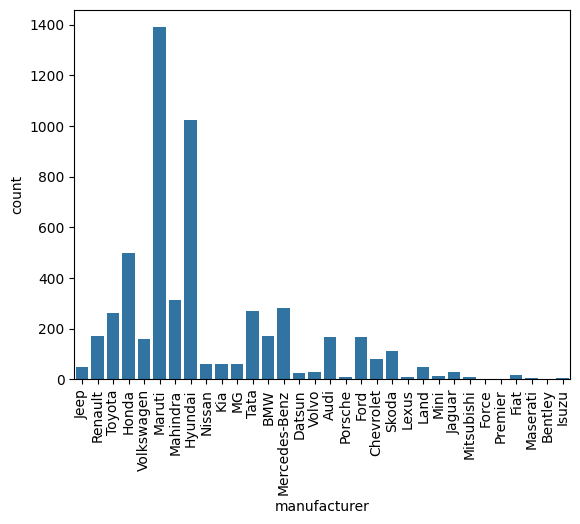

In [30]:
# car count based on manufacturer
ax = sns.countplot(data=df, x=df['manufacturer'])
ax.tick_params(axis='x', rotation=90)

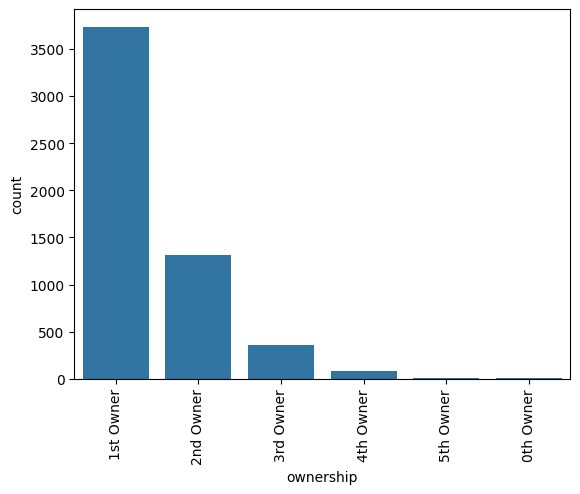

In [31]:
# car count based on ownership
ax = sns.countplot(data=df, x=df['ownership'])
ax.tick_params(axis='x', rotation=90)

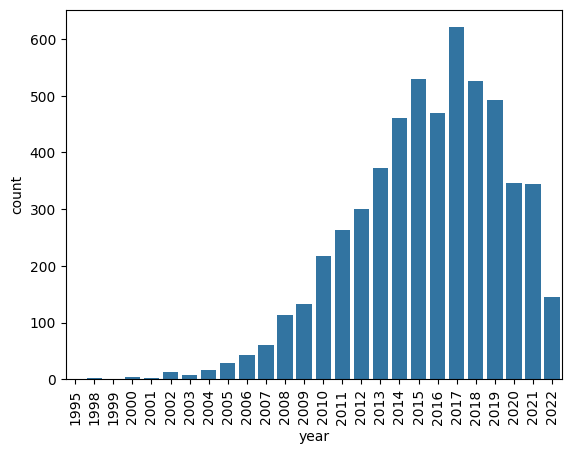

In [32]:
# car count based on year
ax = sns.countplot(data=df, x=df['year'])
ax.tick_params(axis='x', rotation=90)

In [33]:
df['fuel_type'].value_counts()

fuel_type
Petrol      2967
Diesel      2423
Cng           80
Lpg           28
Electric      14
Name: count, dtype: int64

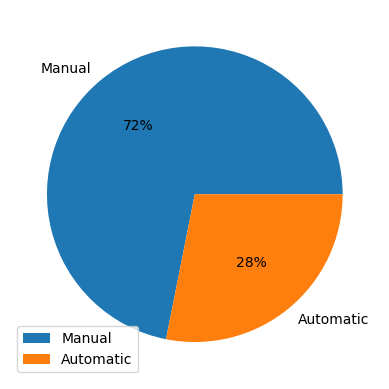

In [34]:
# distribution of cars by transmission
labels = ['Manual', 'Automatic']
plt.pie(df['transmission'].value_counts(), labels = labels, autopct='%.0f%%')
plt.legend()
plt.show()

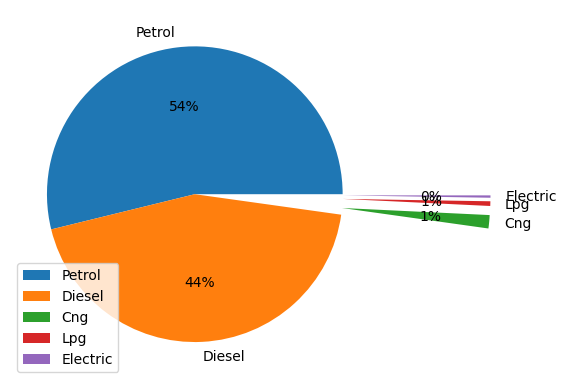

In [35]:
# distribution of cars by fuel type
labels = ['Petrol', 'Diesel', 'Cng', 'Lpg', 'Electric']
plt.pie(df['fuel_type'].value_counts(), labels = labels, explode=[0, 0, 1, 1, 1], autopct='%.0f%%')
plt.legend()
plt.show()

<Axes: title={'center': 'Average car price by Year'}, xlabel='year'>

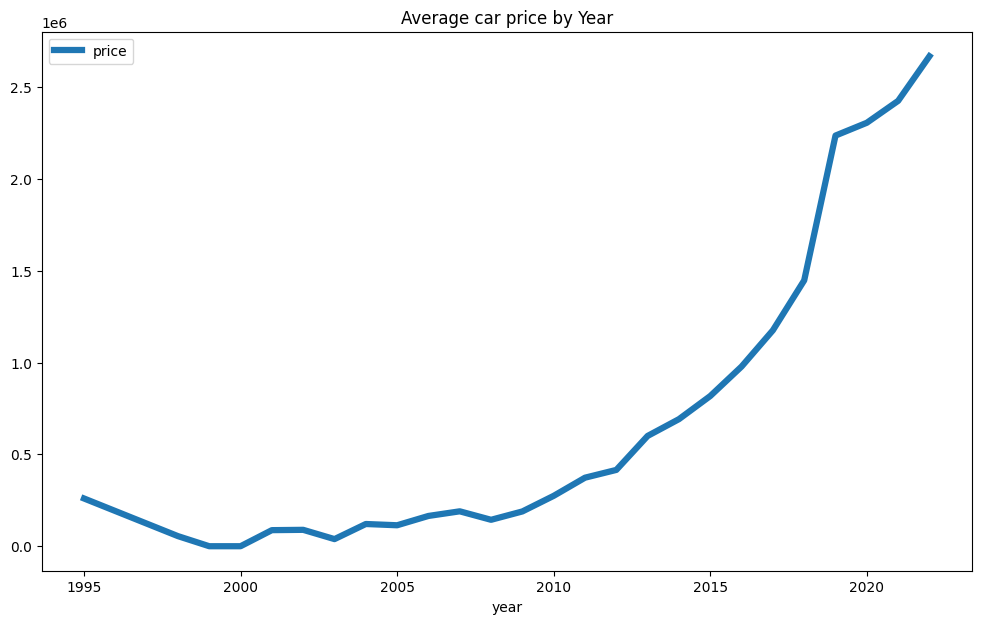

In [36]:
vis_1=pd.pivot_table(df, index=['year'],values = ['price'],aggfunc = 'mean') 
vis_1.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by Year')

<Axes: title={'center': 'Average car price by kilometers driven'}, xlabel='kms_driven'>

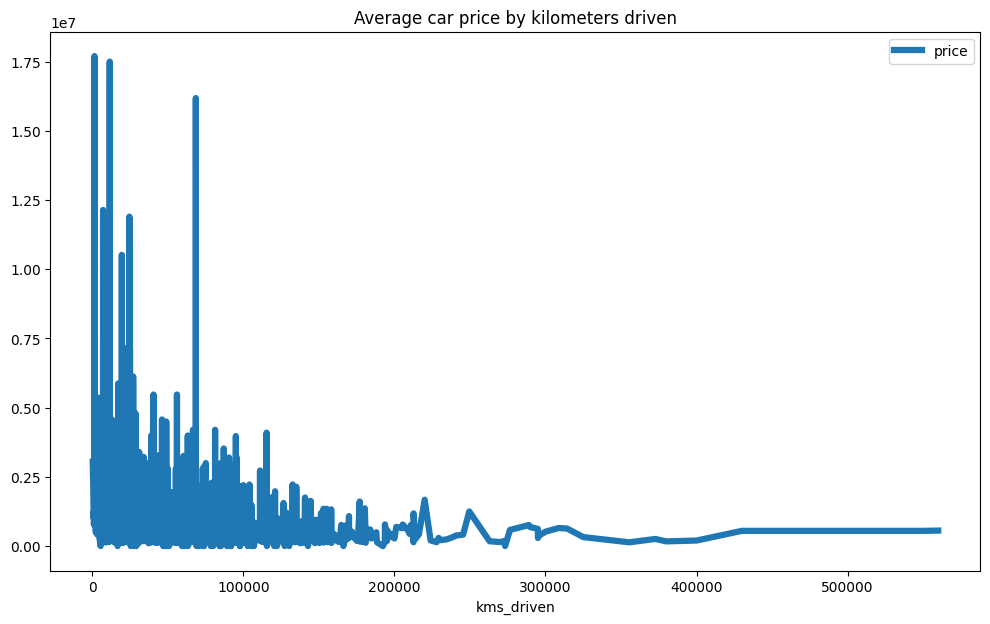

In [37]:
vis_2=pd.pivot_table(df, index=['kms_driven'],values = ['price'],aggfunc = 'mean') 
vis_2.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by kilometers driven')

<Axes: title={'center': 'Average car price by number of owners'}, xlabel='ownership'>

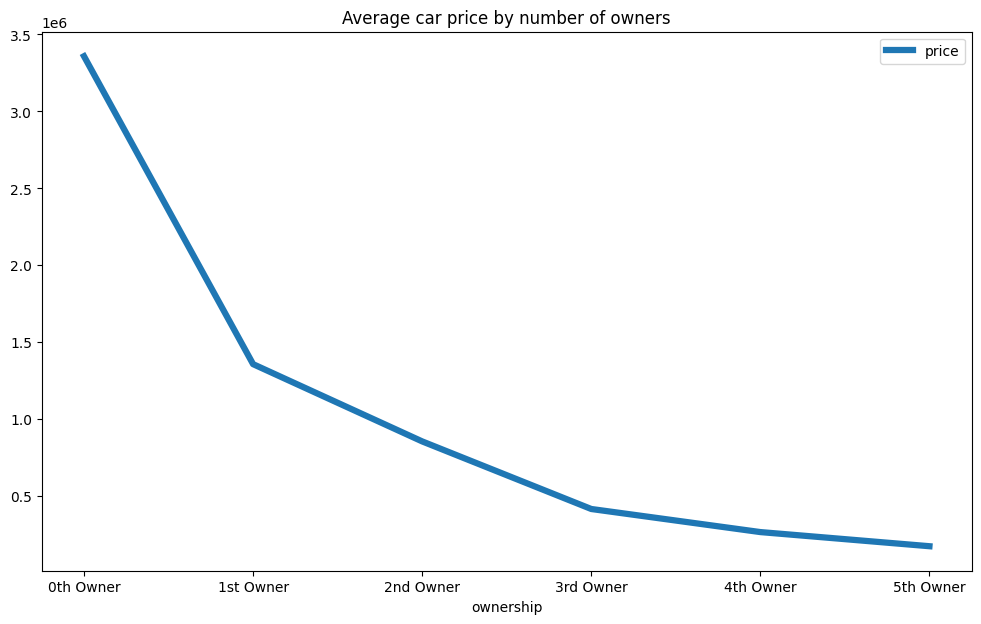

In [38]:
vis_3=pd.pivot_table(df, index=['ownership'],values = ['price'],aggfunc = 'mean') 
vis_3.plot(kind='line',linewidth=4.5,figsize=(12,7),title='Average car price by number of owners')

In [41]:
# plt.figure(figsize=(10,7))
# sns.heatmap(df[["price","model","year","kms_driven","engine"]].corr(), annot=True,linewidths=.5,fmt='.2f')
# plt.title("Correlation Graph",size=18)
df.head()

,manufacturer,model,year,kms_driven,engine,fuel_type,transmission,Seats,ownership,price
0,Jeep,Compass,2017,86226,1956,Diesel,Manual,5,1st Owner,1003000.0
1,Renault,Duster,2021,13248,1330,Petrol,Automatic,5,1st Owner,1283000.0
2,Toyota,Camry,2016,60343,2494,Petrol,Automatic,5,1st Owner,1640000.0
3,Honda,Jazz,2018,26696,1199,Petrol,Automatic,5,1st Owner,777000.0
4,Volkswagen,Polo,2016,69414,1199,Petrol,Manual,5,1st Owner,515000.0


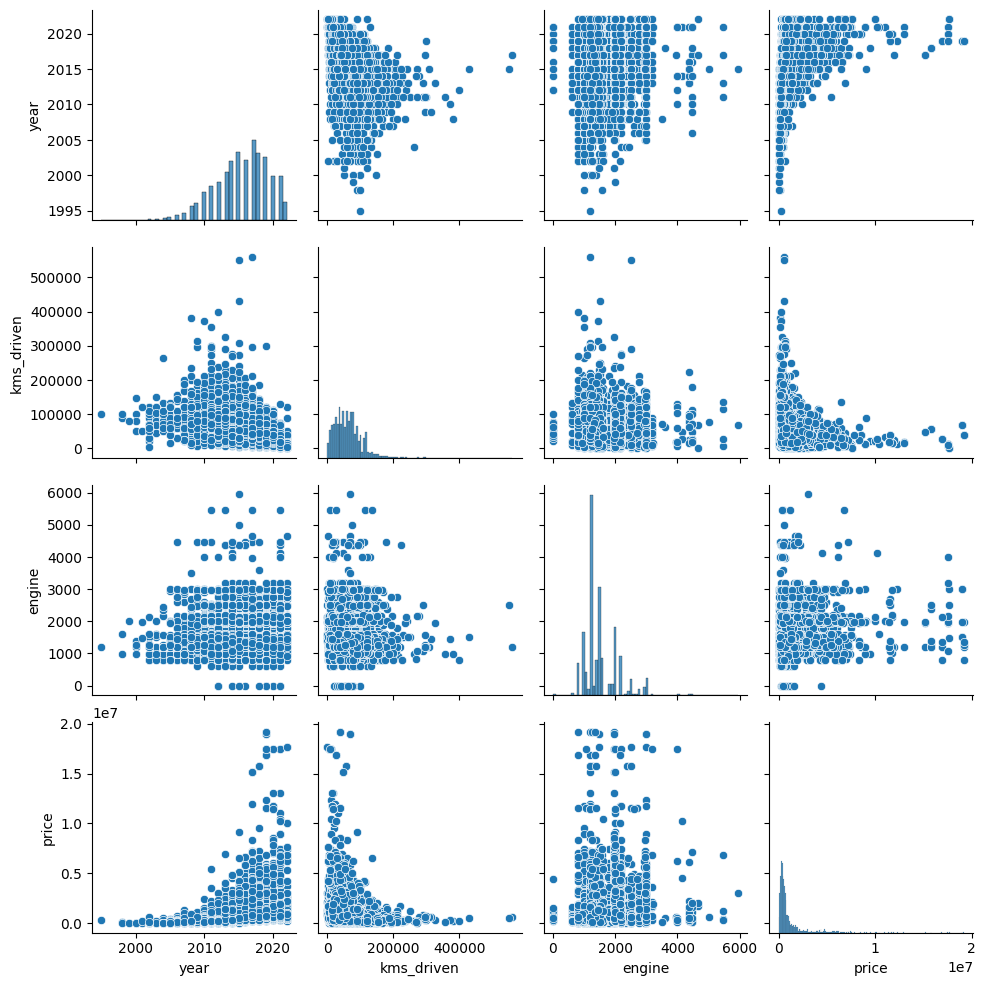

In [42]:
# pairplot 
sns.pairplot(df)

In [62]:
df.head()

,manufacturer,model,year,kms_driven,engine,fuel_type,transmission,Seats,ownership,price
0,12,47,2017,86226,1956,1,1,2,1,1003000.0
1,26,54,2021,13248,1330,4,0,2,1,1283000.0
2,29,39,2016,60343,2494,4,0,2,1,1640000.0
3,8,99,2018,26696,1199,4,0,2,1,777000.0
4,30,138,2016,69414,1199,4,1,2,1,515000.0


# 5.Encoding the data

In [43]:
labelencoder = LabelEncoder()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  5512 non-null   object 
 1   model         5512 non-null   object 
 2   year          5512 non-null   int64  
 3   kms_driven    5512 non-null   int64  
 4   engine        5512 non-null   int64  
 5   fuel_type     5512 non-null   object 
 6   transmission  5512 non-null   object 
 7   Seats         5512 non-null   object 
 8   ownership     5512 non-null   object 
 9   price         5512 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 430.8+ KB


In [45]:
# encoding the car's manufacturer with label encoder
df['manufacturer'] = labelencoder.fit_transform(df['manufacturer'])

# encoding the car's model with label encoder
df['model'] = labelencoder.fit_transform(df['model'])

# encoding the car's fuel type with label encoder
df['fuel_type'] = labelencoder.fit_transform(df['fuel_type'])

# encoding the car's transmission with label encoder
df['transmission'] = labelencoder.fit_transform(df['transmission'])

# encoding the number of seats with label encoder
df['Seats'] = labelencoder.fit_transform(df['Seats'])

# encoding the number of owners with label encoder
df['ownership'] = labelencoder.fit_transform(df['ownership'])

In [46]:
# view the encoded data frame
df.head()

,manufacturer,model,year,kms_driven,engine,fuel_type,transmission,Seats,ownership,price
0,12,47,2017,86226,1956,1,1,2,1,1003000.0
1,26,54,2021,13248,1330,4,0,2,1,1283000.0
2,29,39,2016,60343,2494,4,0,2,1,1640000.0
3,8,99,2018,26696,1199,4,0,2,1,777000.0
4,30,138,2016,69414,1199,4,1,2,1,515000.0


# 6.Splitting the data

In [47]:
# splitting into feature and label
X = df.drop('price', axis=1)
y = df['price']

In [48]:
X.head(), X.shape

(   manufacturer  model  year  kms_driven  engine  fuel_type  transmission  \
 0            12     47  2017       86226    1956          1             1   
 1            26     54  2021       13248    1330          4             0   
 2            29     39  2016       60343    2494          4             0   
 3             8     99  2018       26696    1199          4             0   
 4            30    138  2016       69414    1199          4             1   
 
    Seats  ownership  
 0      2          1  
 1      2          1  
 2      2          1  
 3      2          1  
 4      2          1  ,
 (5512, 9))

In [49]:
y.head(), y.shape

(0    1003000.0
 1    1283000.0
 2    1640000.0
 3     777000.0
 4     515000.0
 Name: price, dtype: float64,
 (5512,))

In [50]:
# splitting into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4409, 9), (1103, 9), (4409,), (1103,))

# 7.Training the model

In [51]:
# train
regr = RandomForestRegressor(n_estimators=1500, max_depth=50, random_state=42)
regr.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=50, n_estimators=1500, random_state=42)

In [52]:
# make prediction
predictions = regr.predict(X_test)

Text(0.5, 1.0, 'Prediction and Original data correlation')

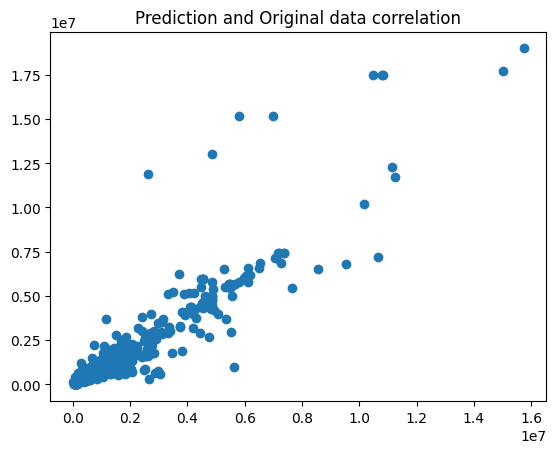

In [53]:
plt.scatter(predictions,y_test)
plt.title('Prediction and Original data correlation')

In [54]:
# score on train data
regr.score(X_train, y_train)

0.9829485701405315

# 8.Model Evaluation

In [55]:
# mse
mse = mean_squared_error(y_test.values.ravel(), predictions)

In [56]:
# mae
mae = mean_absolute_error(y_test.values.ravel(), predictions)

In [57]:
# r2
r2 = r2_score(y_test.values.ravel(), predictions)

In [58]:
# results
print(f"MSE: {round(mse, 2)}")
print(f"MAE: {round(mae, 2)}")
print(f"R2 Score: {round(r2, 2)}")

MSE: 604270658119.01
MAE: 251590.71
R2 Score: 0.85


In [61]:
df.head()

,manufacturer,model,year,kms_driven,engine,fuel_type,transmission,Seats,ownership,price
0,12,47,2017,86226,1956,1,1,2,1,1003000.0
1,26,54,2021,13248,1330,4,0,2,1,1283000.0
2,29,39,2016,60343,2494,4,0,2,1,1640000.0
3,8,99,2018,26696,1199,4,0,2,1,777000.0
4,30,138,2016,69414,1199,4,1,2,1,515000.0
